<a href="https://colab.research.google.com/github/seregamikhailov/Credit-scoring/blob/main/Credit_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit scoring.
Dataset from Kaggle. pet - Project

# Import data + libraries


In [563]:
#!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


In [564]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier


from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score,log_loss

RAND = 10

In [520]:
data = pd.read_csv('/content/bank.csv',sep = ';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [521]:
sum(data.isna().sum())

0

In [522]:
data = data.drop(columns = ['day','month'],axis = 1)

In [523]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   duration   4521 non-null   int64 
 10  campaign   4521 non-null   int64 
 11  pdays      4521 non-null   int64 
 12  previous   4521 non-null   int64 
 13  poutcome   4521 non-null   object
 14  y          4521 non-null   object
dtypes: int64(6), object(9)
memory usage: 529.9+ KB


In [524]:
data.describe()

,age,balance,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000,25.000000


In [525]:
data.nunique()

,0
age,67
job,12
marital,3
education,4
default,2
balance,2353
housing,2
loan,2
contact,3
duration,875


In [526]:
data.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,4,2
top,management,married,secondary,no,yes,no,cellular,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,3705,4000


In [527]:
data['job'].nunique()

12

# Exploring data analysis



my hypotheses:
1. People with job status “unemployed” most likely not receive a credit;
2. People with loan status 'yes' mots likely not receive a credit;
3. People with negative balance most likely not receive a credit;


# Loan


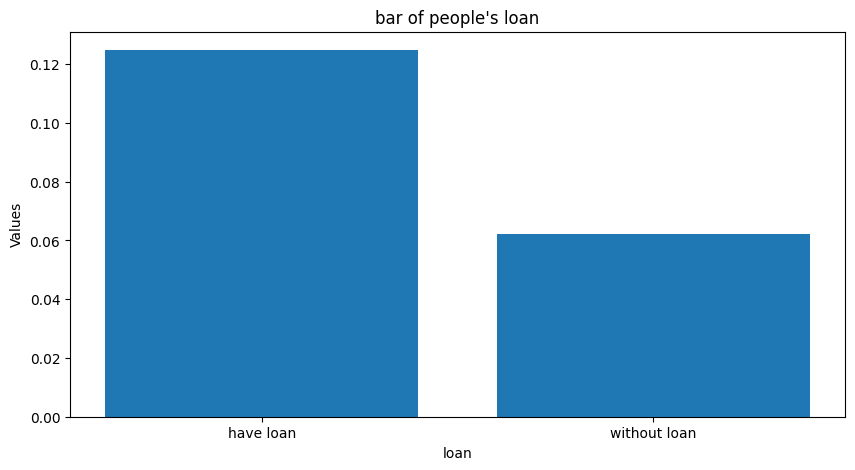

In [528]:
data[data['loan']=='no']['y'].value_counts()
people_without_loan = len(data[(data['loan'] == 'no')&(data['y']=='yes')]['y'].values)/(len(data[(data['loan']=='no')]['y'].values))
people_have_loan = len(data[(data['loan'] == 'yes')&(data['y']=='yes')]['y'].values)/(len(data[(data['loan']=='yes')]['y'].values))
plt.figure(figsize = (10,5))
plt.bar(['have loan','without loan'],[people_without_loan,people_have_loan])
plt.xlabel('loan')
plt.ylabel('Values')
plt.title('bar of people\'s loan')
plt.show()

my first hypothesis is confirmed, people who have loans are unlikely to get a credit

# Jobs

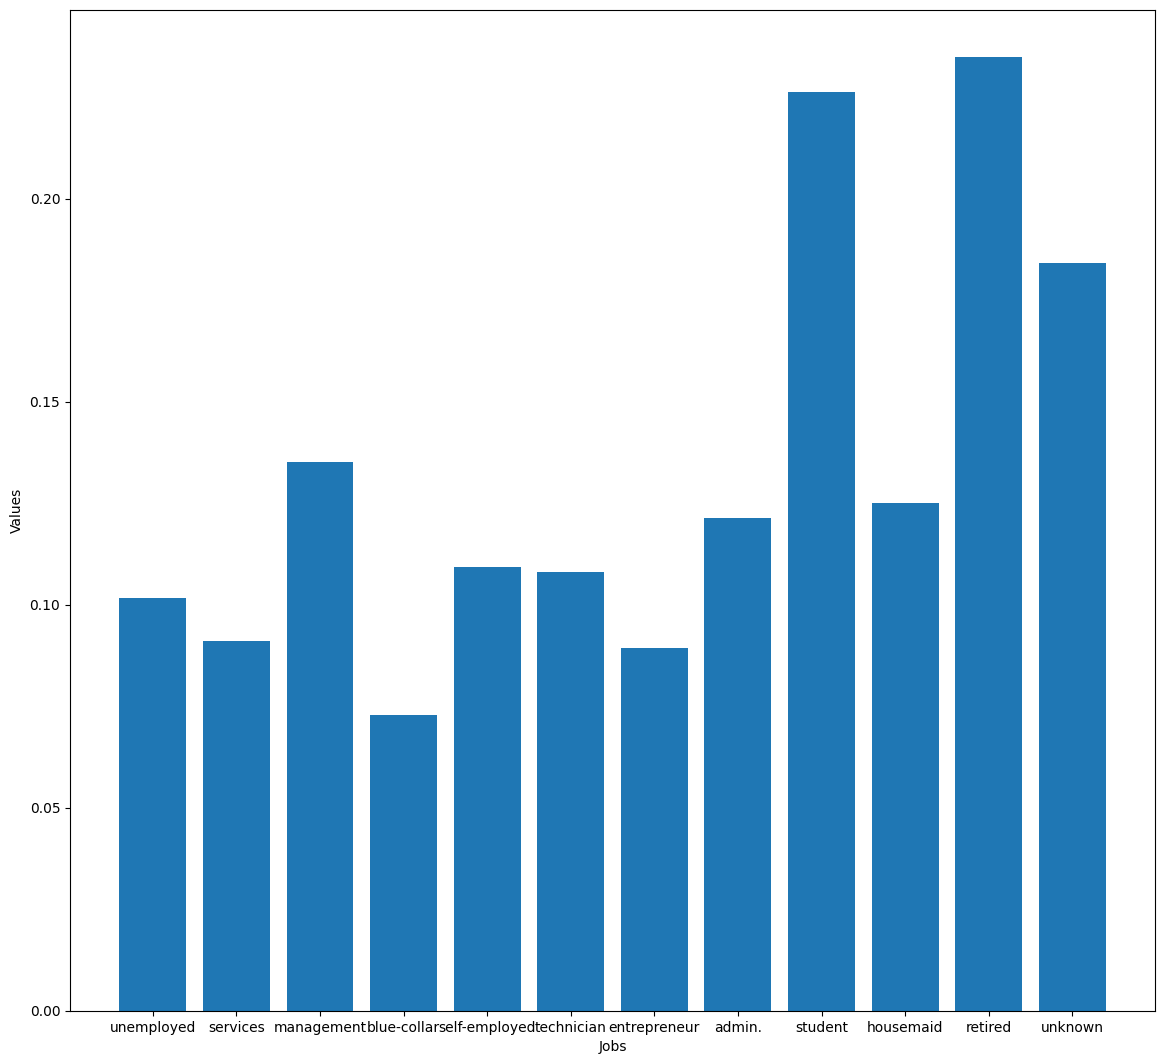

In [529]:
array_of_jobs = data['job'].unique()
dict_of_percent_jobs = {}
for i in array_of_jobs:
  dict_of_percent_jobs[i] = len(data[(data['job'] == i)&(data['y']=='yes')]['y'].values)/(len(data[(data['job'] == i)]['y'].values))
keys = list(dict_of_percent_jobs.keys())
values = list(dict_of_percent_jobs.values())
plt.figure(figsize = (14,13))
plt.bar(keys,values)
plt.xlabel('Jobs')
plt.ylabel('Values')
plt.title('')
plt.show()

the second hypothesis is almost confirmed
on average, unemployed people are less likely to get a credit

#Balance

In [530]:
data.groupby('y')['balance'].median()

,balance
y,
no,419.5
yes,710.0


In [531]:
data.groupby('y')['balance'].mean()

,balance
y,
no,1403.211750
yes,1571.955854


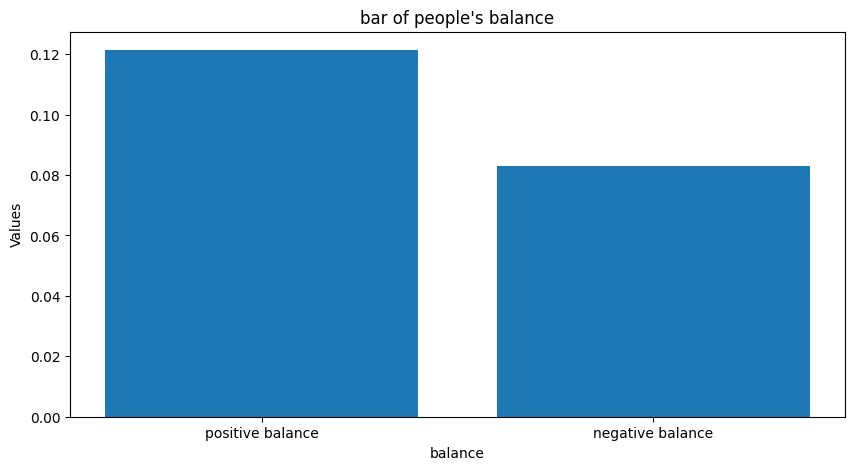

In [532]:
people_balance_positive_balance = len(data[(data['balance'] > 0)&(data['y']=='yes')]['y'].values)/(len(data[(data['balance']>0)]['y'].values))
people_balance_negative_balance = len(data[(data['balance'] <= 0)&(data['y']=='yes')]['y'].values)/(len(data[(data['balance']<=0)]['y'].values))
plt.figure(figsize = (10,5))
plt.bar(['positive balance','negative balance'],[people_balance_positive_balance,people_balance_negative_balance])
plt.xlabel('balance')
plt.ylabel('Values')
plt.title('bar of people\'s balance')
plt.show()

third hypothese approved
people with positive balance have more chances to get a credit

#Corr

<Axes: >

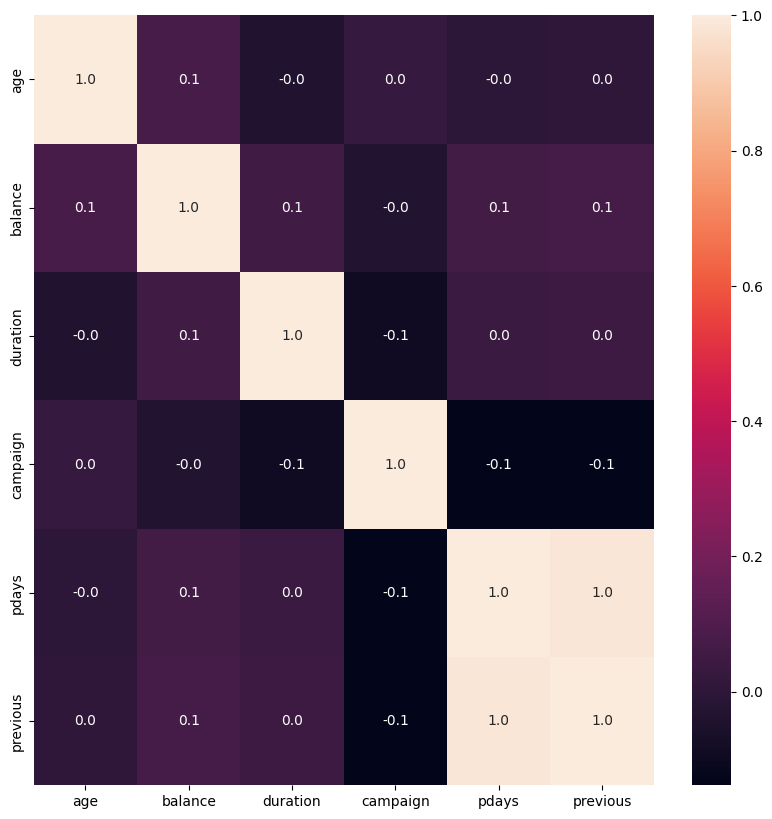

In [533]:
plt.figure(figsize = [10,10])
sns.heatmap(data[data.select_dtypes(exclude = 'object').columns].corr(method = 'spearman'),annot = True,fmt = ".1f")

In [534]:
data = data.drop(columns= ['pdays'])

<Axes: >

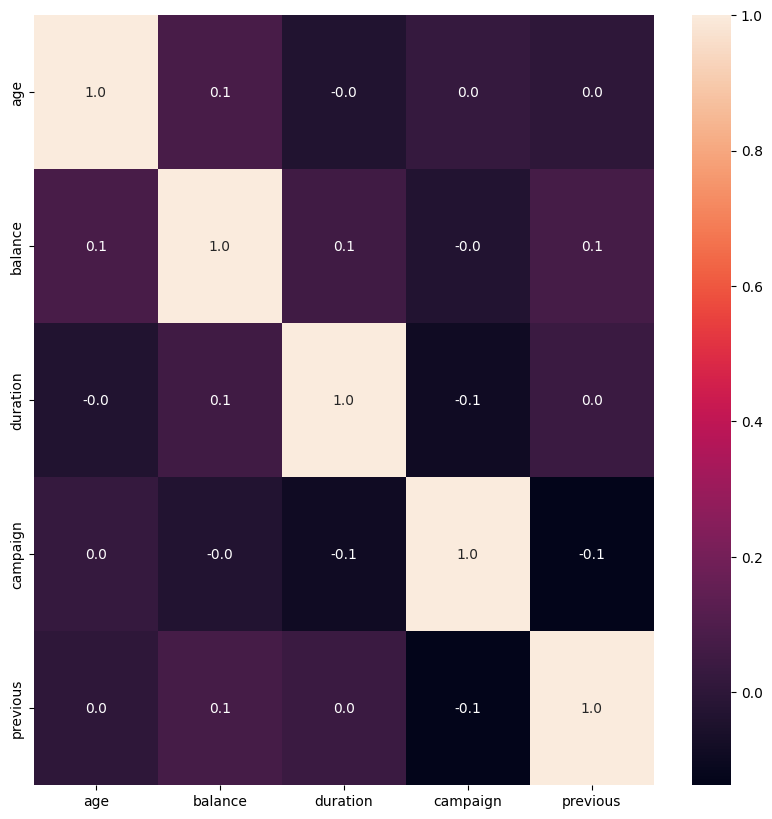

In [535]:
plt.figure(figsize = [10,10])
sns.heatmap(data[data.select_dtypes(exclude = 'object').columns].corr(method = 'spearman'),annot = True,fmt = ".1f")

# Feature engineering

In [536]:
y = data['y']
data = data.drop(columns = ['y'])
y = y.replace(['no','yes'],['0','1'])
y = y.astype(int)

In [537]:
data_columns_num = data.select_dtypes(exclude = ['object']).columns.tolist()
data_columns_cat = data.select_dtypes(include = ['object']).columns.tolist()

<ipython-input-538-65d92ae36fe6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(data['age'])


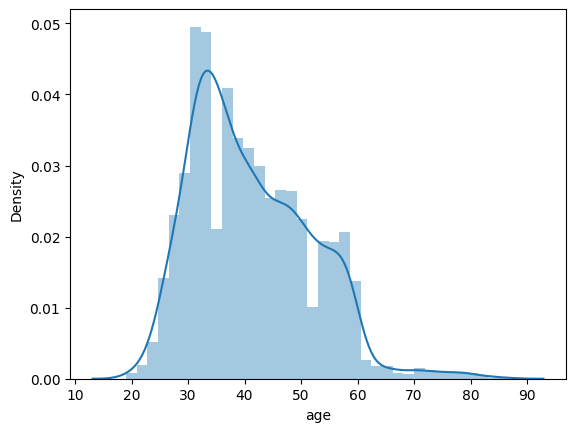

In [538]:
sns_plot = sns.distplot(data['age'])

Text(0.5, 0.98, 'Histograms of various features')

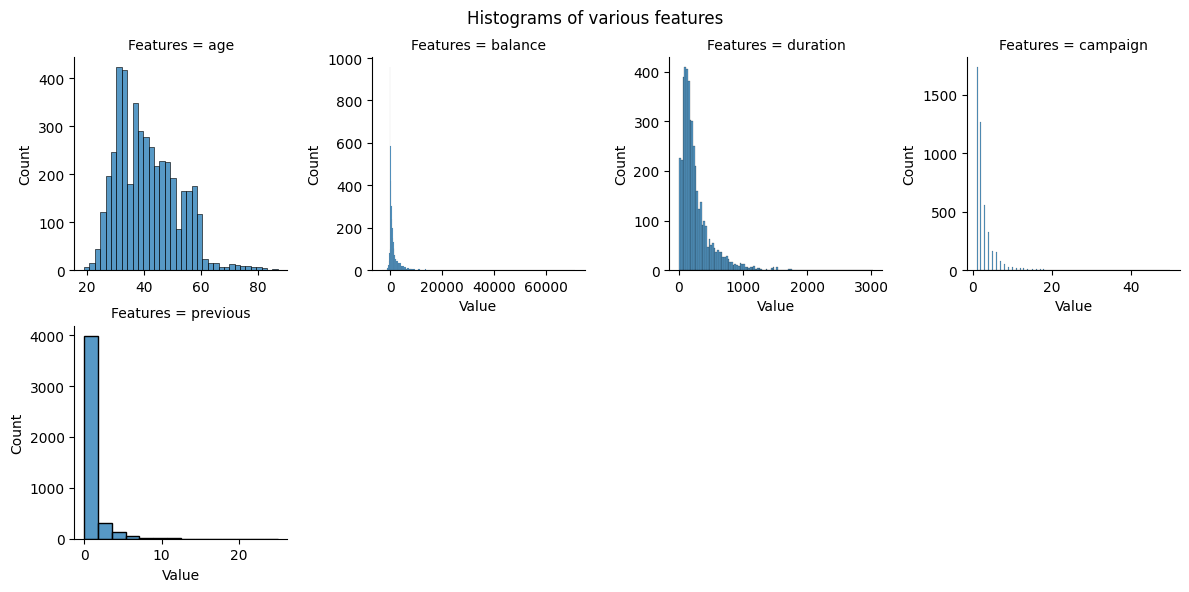

In [539]:
numeric_features = data[data_columns_num]
numeric_features = numeric_features.stack().reset_index().rename(columns = {"level_1":"Features",0:"Value"})
numeric_features
ax = sns.FacetGrid(data = numeric_features,col = "Features",col_wrap = 4,sharex = False,sharey=False)
ax = ax.map(sns.histplot,"Value")
plt.subplots_adjust(top = 0.9)
plt.suptitle("Histograms of various features")

In [540]:
for i in ['duration','campaign','previous']:
  data[i] = np.log(data[i]+1)

In [541]:
# for i in ['balance','duration','campaign','previous']:
#   data[i] = np.cbrt(data[i])

Text(0.5, 0.98, 'Histograms of various features')

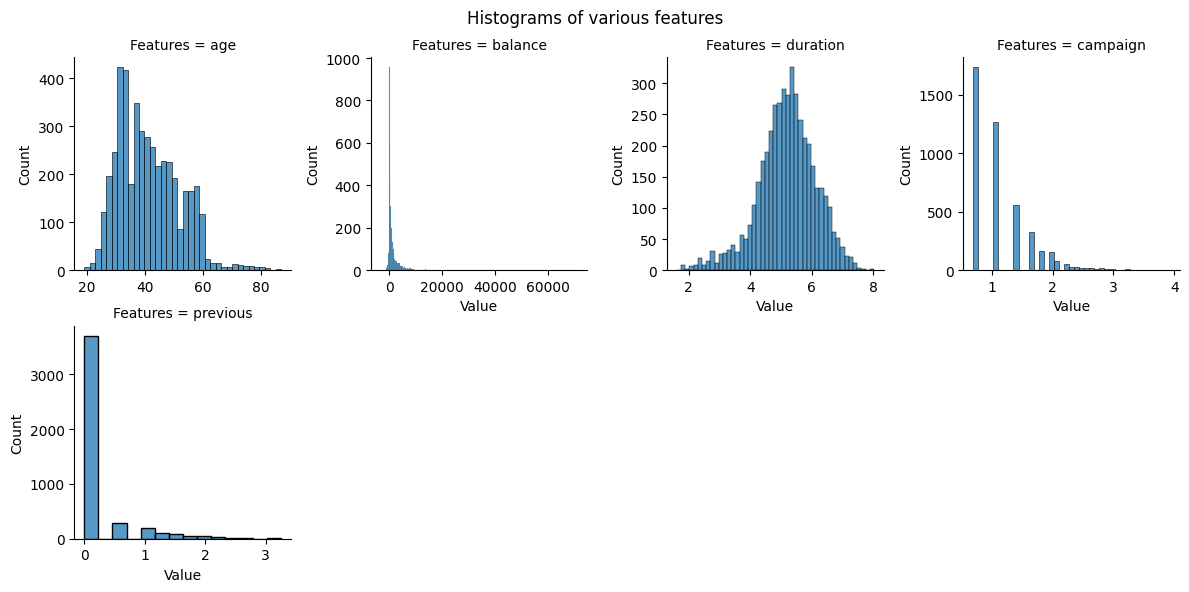

In [542]:
numeric_features = data[data_columns_num]
numeric_features = numeric_features.stack().reset_index().rename(columns = {"level_1":"Features",0:"Value"})
numeric_features
ax = sns.FacetGrid(data = numeric_features,col = "Features",col_wrap = 4,sharex = False,sharey=False)
ax = ax.map(sns.histplot,"Value")
plt.subplots_adjust(top = 0.9)
plt.suptitle("Histograms of various features")

In [543]:
# new feature
mean_income_age = data.groupby('age')['balance'].median().to_dict()
data['mean_income_age'] = data['age'].map(mean_income_age)


<Axes: >

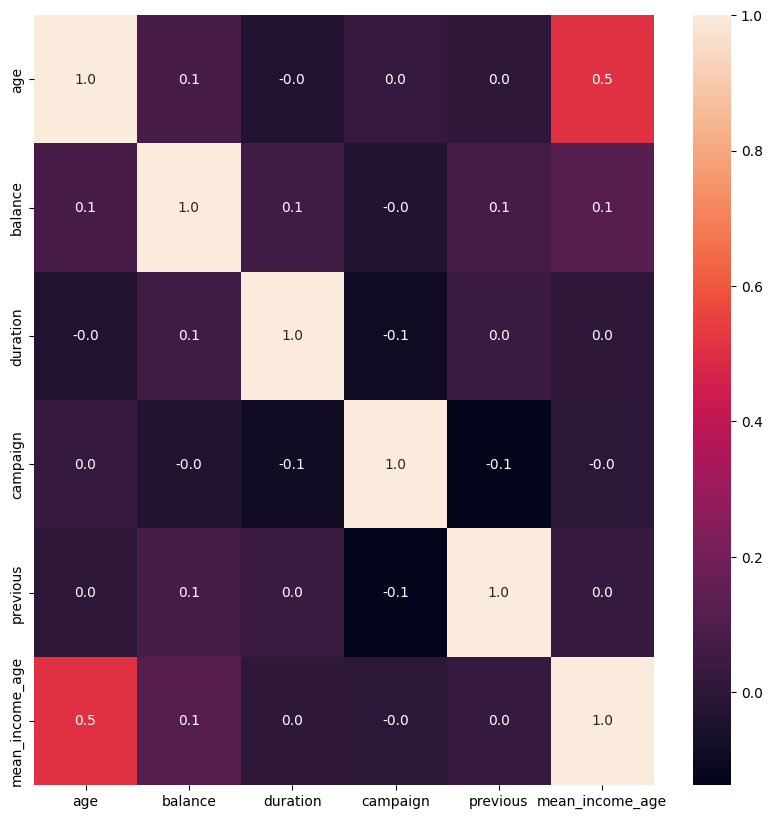

In [544]:
plt.figure(figsize = [10,10])
sns.heatmap(data[data.select_dtypes(exclude = 'object').columns].corr(method = 'spearman'),annot = True,fmt = ".1f")

In [545]:
encoder = OneHotEncoder(handle_unknown='ignore',drop = 'first',sparse_output=False)
one_hot_encoded = encoder.fit_transform(data[data_columns_cat])


In [546]:
df_one_hot_encoded = pd.DataFrame(one_hot_encoded,columns=encoder.get_feature_names_out(data_columns_cat))
X = pd.concat([data,df_one_hot_encoded],axis = 1)
X = X.drop(data_columns_cat,axis = 1)

In [547]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,stratify = y,shuffle = True,random_state=RAND)

#Baseline

In [548]:
model = LogisticRegression(random_state = RAND,class_weight='balanced').fit(X_train,y_train)
y_pred = model.predict(X_test)

y_score = model.predict_proba(X_test)[:,1]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [551]:
print("roc_auc_score: ",roc_auc_score(y_test,y_score))
print("log_loss: ",log_loss(y_test,y_pred))

roc_auc_score:  0.8208406977637748
log_loss:  9.847470289334394


#Grid_search

In [552]:
params_grid_search = {'penalty':['l1','l2','elasticnet','none'],
                      'C': np.linspace(1,1000,num = 5),
                      'solver': ['sag','saga','lbfgs'],
                      'l1_ratio':[0.25,0.5,0.75],
                      'max_iter':np.arange(100,500,100)}
grid_cv = GridSearchCV(model, param_grid=params_grid_search,cv = 3,verbose = True,n_jobs = -1)

In [553]:
grid_cv.fit(X_train,y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File 

GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=10),
             n_jobs=-1,
             param_grid={'C': array([   1.  ,  250.75,  500.5 ,  750.25, 1000.  ]),
                         'l1_ratio': [0.25, 0.5, 0.75],
                         'max_iter': array([100, 200, 300, 400]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['sag', 'saga', 'lbfgs']},
             verbose=True)

In [554]:
print(grid_cv.best_params_)

{'C': 1.0, 'l1_ratio': 0.25, 'max_iter': 400, 'penalty': 'none', 'solver': 'lbfgs'}


In [555]:
print(grid_cv.best_score_)

0.7855457227138642


In [560]:
model_grid = LogisticRegression(C =  1.0, max_iter =  400, penalty =  None, solver =  'lbfgs',class_weight='balanced')
model_grid.fit(X_train,y_train)
y_pred_grid = model_grid.predict(X_test)
y_score_grid = model_grid.predict_proba(X_test)[:,1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [561]:
print("roc_auc_score: ",roc_auc_score(y_test,y_score_grid))
print("log_loss: ",log_loss(y_test,y_pred_grid))

roc_auc_score:  0.8525474525474526
log_loss:  8.47711034615841


#CatBoost

In [567]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              4521 non-null   int64  
 1   job              4521 non-null   object 
 2   marital          4521 non-null   object 
 3   education        4521 non-null   object 
 4   default          4521 non-null   object 
 5   balance          4521 non-null   int64  
 6   housing          4521 non-null   object 
 7   loan             4521 non-null   object 
 8   contact          4521 non-null   object 
 9   duration         4521 non-null   float64
 10  campaign         4521 non-null   float64
 11  previous         4521 non-null   float64
 12  poutcome         4521 non-null   object 
 13  mean_income_age  4521 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 494.6+ KB


In [569]:
data
cat_features_id = [1,2,3,4,6,7,8,12]

In [571]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,0
4518,0
4519,0


In [572]:
data

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,mean_income_age
0,30,unemployed,married,primary,no,1787,no,no,cellular,4.382027,0.693147,0.000000,unknown,367.0
1,33,services,married,secondary,no,4789,yes,yes,cellular,5.398163,0.693147,1.609438,failure,358.5
2,35,management,single,tertiary,no,1350,yes,no,cellular,5.225747,0.693147,0.693147,failure,370.5
3,30,management,married,tertiary,no,1476,yes,yes,unknown,5.298317,1.609438,0.000000,unknown,367.0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5.424950,0.693147,0.000000,unknown,593.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,5.799093,1.791759,0.000000,unknown,358.5
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,5.036953,0.693147,0.000000,unknown,282.0
4518,57,technician,married,secondary,no,295,no,no,cellular,5.023881,2.484907,0.000000,unknown,282.0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,4.867534,1.609438,1.386294,other,317.0


In [575]:
data.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
duration,0


In [576]:
X_train_boost,X_test_boost,y_train_boost,y_test_boost = train_test_split(data,y,test_size=0.25,shuffle=True,stratify = y,random_state = RAND)
model_catboost = CatBoostClassifier()
model_catboost.fit(X_train_boost,y_train_boost,cat_features_id)
y_pred_boost = model_catboost.predict(X_test_boost)
y_pred_boost_proba = model_catboost.predict_proba(X_test_boost)[:,1]

Learning rate set to 0.017351
0:	learn: 0.6750262	total: 30.8ms	remaining: 30.8s
1:	learn: 0.6542494	total: 61.9ms	remaining: 30.9s
2:	learn: 0.6362881	total: 101ms	remaining: 33.7s
3:	learn: 0.6194677	total: 140ms	remaining: 34.7s
4:	learn: 0.6034745	total: 164ms	remaining: 32.6s
5:	learn: 0.5897706	total: 175ms	remaining: 29s
6:	learn: 0.5742587	total: 194ms	remaining: 27.5s
7:	learn: 0.5595954	total: 214ms	remaining: 26.6s
8:	learn: 0.5496594	total: 221ms	remaining: 24.3s
9:	learn: 0.5356044	total: 258ms	remaining: 25.6s
10:	learn: 0.5238500	total: 297ms	remaining: 26.7s
11:	learn: 0.5118008	total: 317ms	remaining: 26.1s
12:	learn: 0.4988488	total: 338ms	remaining: 25.7s
13:	learn: 0.4879989	total: 355ms	remaining: 25s
14:	learn: 0.4794397	total: 369ms	remaining: 24.2s
15:	learn: 0.4708719	total: 395ms	remaining: 24.3s
16:	learn: 0.4627138	total: 427ms	remaining: 24.7s
17:	learn: 0.4550905	total: 437ms	remaining: 23.8s
18:	learn: 0.4476068	total: 458ms	remaining: 23.6s
19:	learn: 0.

In [581]:
print("roc_auc_score: ",roc_auc_score(y_test,y_pred_boost_proba))
print("log_loss: ",log_loss(y_test,y_pred_boost))

roc_auc_score:  0.8781372473680167
log_loss:  3.7605226347620015
